### Heart Disease Predition ML Model

Final Project - ADS January 2022 Cohort

Dataset source:  https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

In [66]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings
warnings.filterwarnings('ignore')

In [67]:
# Loading the dataset as heartdf

heartdf = pd.read_csv('heart.csv')

### Data Discovery

In [68]:
# Preview the first few rows of the dataset
heartdf.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [69]:
# Preview the last rows of the dataset
heartdf.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [70]:
# Listing of the columns name
list(heartdf.columns)

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope',
 'HeartDisease']

### The dataset columns information

Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]


In [71]:
# Data shape
heartdf.shape

(918, 12)

In [72]:
# Data type
heartdf.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [73]:
# The technical summary of the dataset
heartdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [74]:
# Statistical summary of columns with numerical value
heartdf.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [75]:
# Checking for nas
heartdf.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [76]:
# Checking for null value
heartdf.isnull().count()

Age               918
Sex               918
ChestPainType     918
RestingBP         918
Cholesterol       918
FastingBS         918
RestingECG        918
MaxHR             918
ExerciseAngina    918
Oldpeak           918
ST_Slope          918
HeartDisease      918
dtype: int64

In [77]:
# The unique values in the dataset
heartdf.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [78]:
# The duplicate values in the dataset
heartdf.duplicated().sum()

0

In [79]:
# Skewness.
for col in heartdf.columns:
    if heartdf[col].dtype != 'object':
        print(f'{col}: {scipy.stats.skew(heartdf[col])}')

Age: -0.19561273124487544
RestingBP: 0.17954532149156327
Cholesterol: -0.6090891046626045
FastingBS: 1.2624170859488144
MaxHR: -0.14412342991429325
Oldpeak: 1.0211999031135828
HeartDisease: -0.21473473034684154


Age: -0.19561273124487544
RestingBP: 0.17954532149156327
Cholesterol: -0.6090891046626045
FastingBS: 1.2624170859488144
MaxHR: -0.14412342991429325
Oldpeak: 1.0211999031135828
HeartDisease: -0.21473473034684154


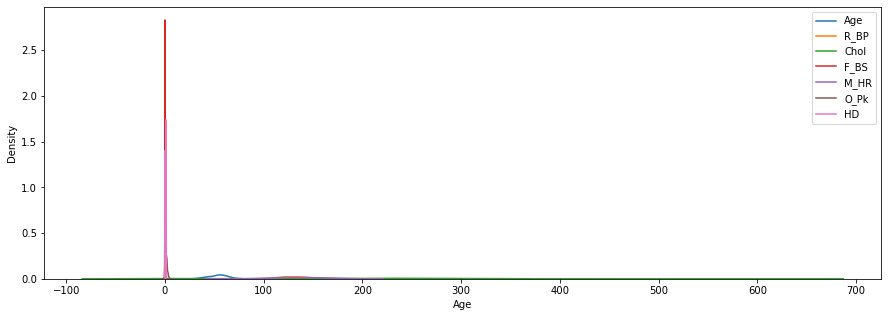

In [80]:
# Skewness.
for col in heartdf.columns:
    if heartdf[col].dtype != 'object':
        print(f'{col}: {scipy.stats.skew(heartdf[col])}')
plt.figure(figsize=(15, 5))
sns.kdeplot(x=heartdf['Age'], label='Age')
sns.kdeplot(x=heartdf['RestingBP'], label='R_BP')
sns.kdeplot(x=heartdf['Cholesterol'], label='Chol')
sns.kdeplot(x=heartdf['FastingBS'], label='F_BS')
sns.kdeplot(x=heartdf['MaxHR'], label='M_HR')
sns.kdeplot(x=heartdf['Oldpeak'], label='O_Pk')
sns.kdeplot(x=heartdf['HeartDisease'], label='HD')
plt.legend()
plt.show()

Age: -0.3905684960842244
RestingBP: 3.2469319615478724
Cholesterol: 0.11103677697582448
FastingBS: -0.4063031011045046
MaxHR: -0.4523389391469048
Oldpeak: 1.189992199237265
HeartDisease: -1.9538889955828693


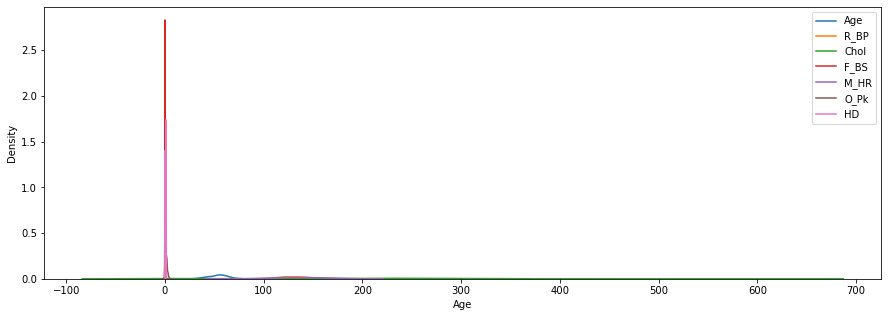

In [81]:
# Kurtosis.
for col in heartdf.columns:
    if heartdf[col].dtype != 'object':
        print(f'{col}: {scipy.stats.kurtosis(heartdf[col])}')
plt.figure(figsize=(15, 5))
sns.kdeplot(x=heartdf['Age'], label='Age')
sns.kdeplot(x=heartdf['RestingBP'], label='R_BP')
sns.kdeplot(x=heartdf['Cholesterol'], label='Chol')
sns.kdeplot(x=heartdf['FastingBS'], label='F_BS')
sns.kdeplot(x=heartdf['MaxHR'], label='M_HR')
sns.kdeplot(x=heartdf['Oldpeak'], label='O_Pk')
sns.kdeplot(x=heartdf['HeartDisease'], label='HD')
plt.legend()
plt.show()

In [82]:
heartdf.value_counts()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease
28   M    ATA            130        132          0          LVH         185    N               0.0      Up        0               1
58   M    ASY            128        216          0          LVH         131    Y               2.2      Flat      1               1
                         130        0            0          ST          100    Y               1.0      Flat      1               1
                                    263          0          Normal      140    Y               2.0      Flat      1               1
                         132        458          1          Normal      69     N               1.0      Down      0               1
                                                                                                                                 ..
50   M    ASY            150        215          0          Normal      140    Y 

In [83]:
heartdf['ChestPainType'].value_counts(ascending=False)

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [84]:
heartdf['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [85]:
heartdf['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

In [86]:
heartdf['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [87]:
heartdf['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [88]:
heartdf['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [89]:
heartdf['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

### Data Visualization

In [90]:
heartdf.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


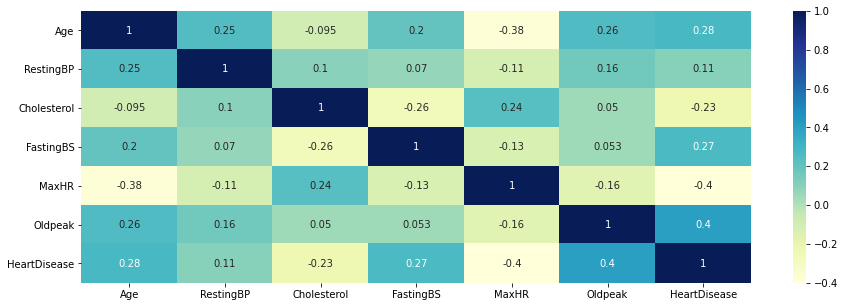

In [91]:
# Plot showing the corelation matrix
plt.figure(figsize=(15, 5))
sns.heatmap(heartdf.corr(), annot=True, cmap='YlGnBu')
plt.show()

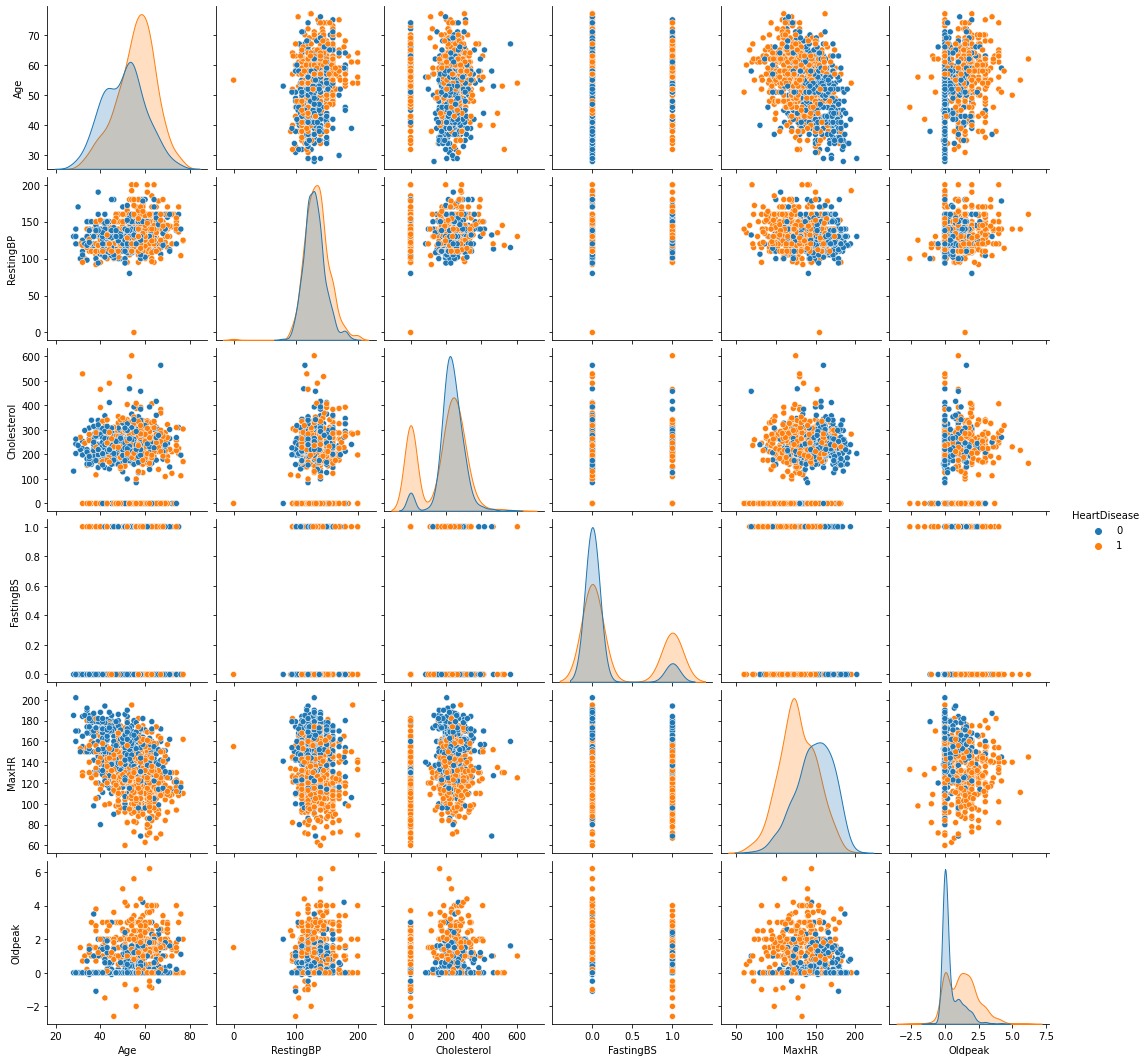

In [92]:
#Scatter Plot Matrix
sns.pairplot(hue='HeartDisease', data=heartdf)

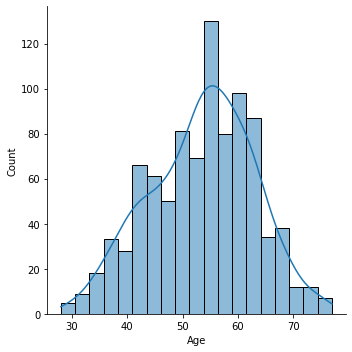

In [93]:
# Age distribition
sns.displot(heartdf['Age'], kde=True)

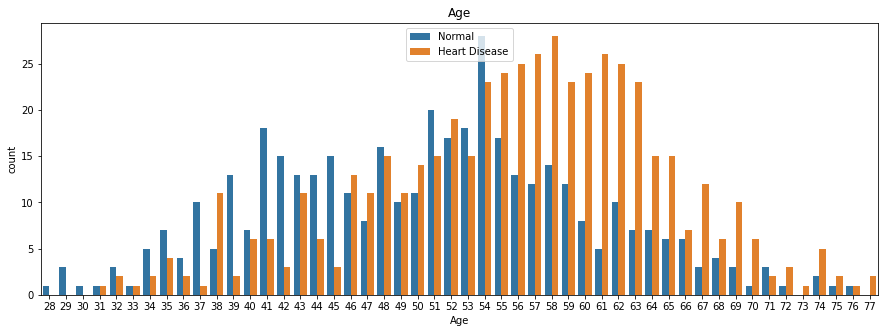

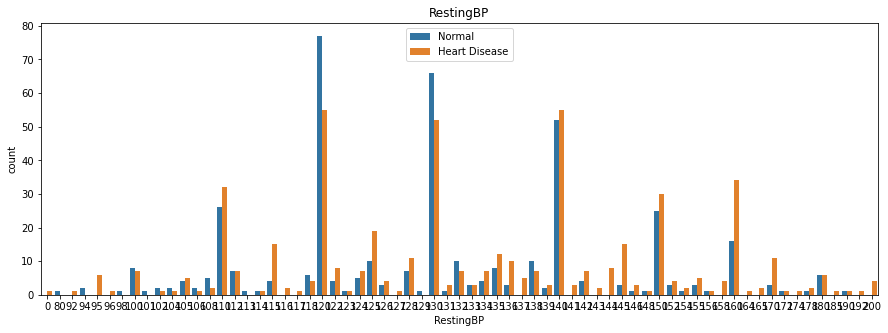

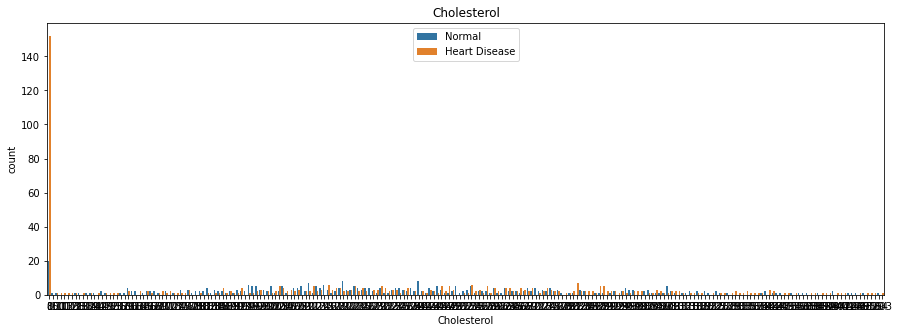

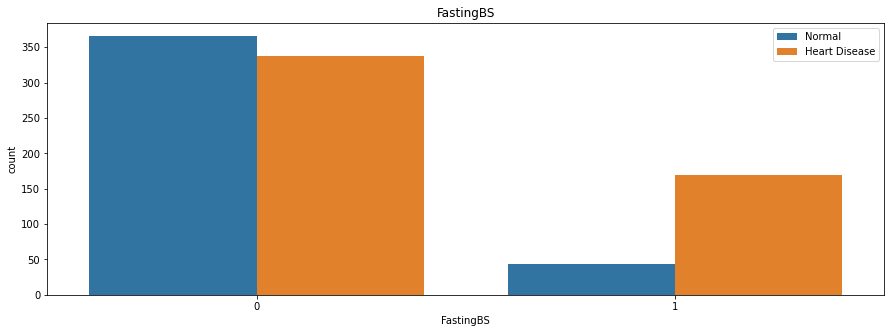

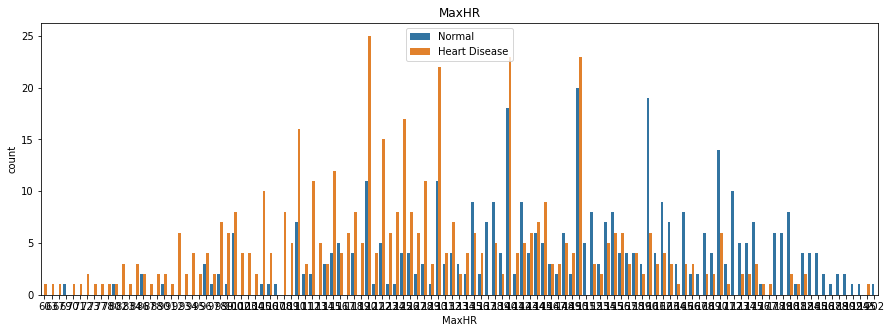

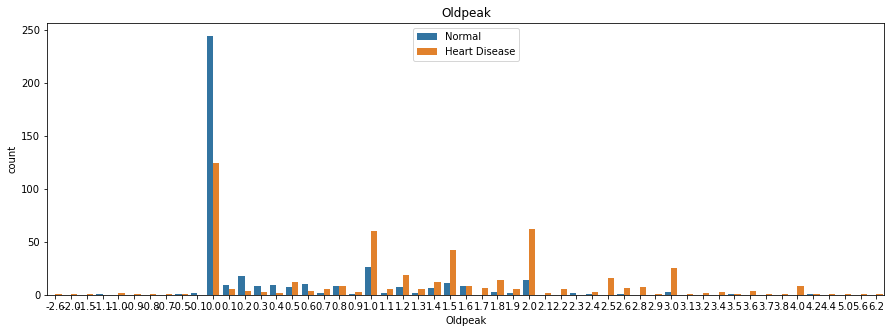

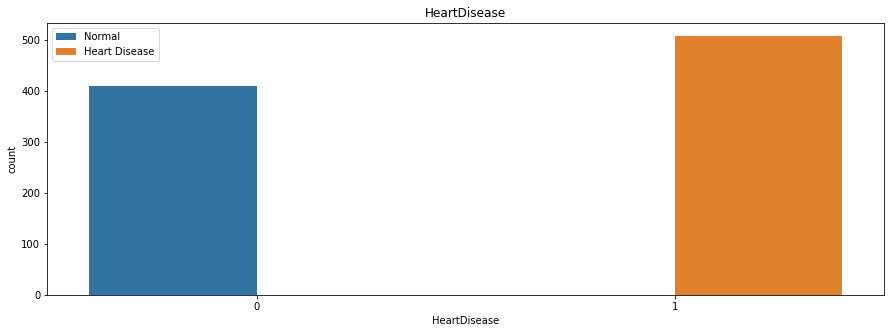

In [94]:
# ploting numerical features with target
Numerical = heartdf.select_dtypes(include=['int64', 'float64'])
for i in Numerical:
    plt.figure(figsize=(15,5))
    sns.countplot(x=i, data=heartdf, hue='HeartDisease')
    plt.legend(['Normal', 'Heart Disease'])
    plt.title(i)
    plt.show()

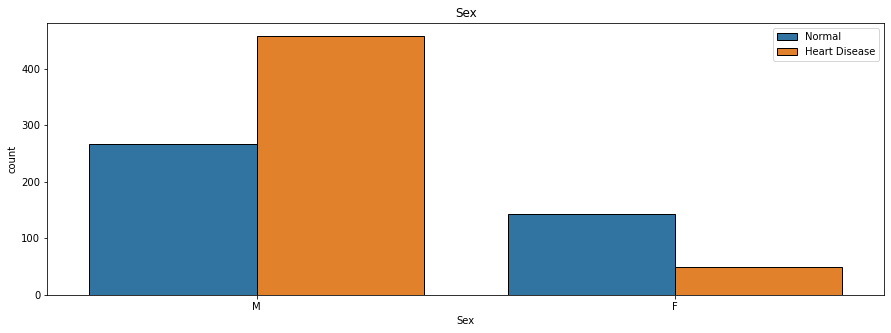

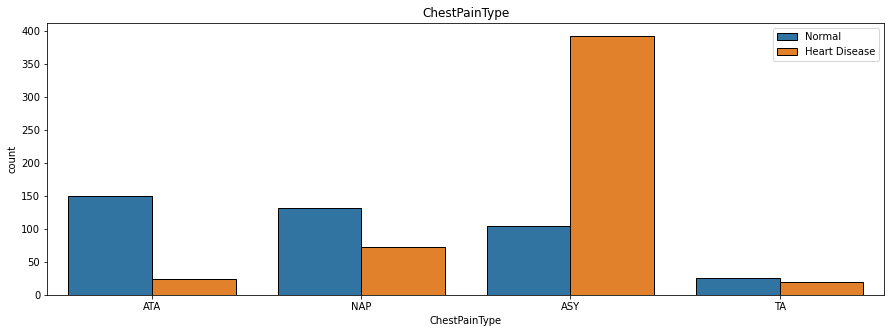

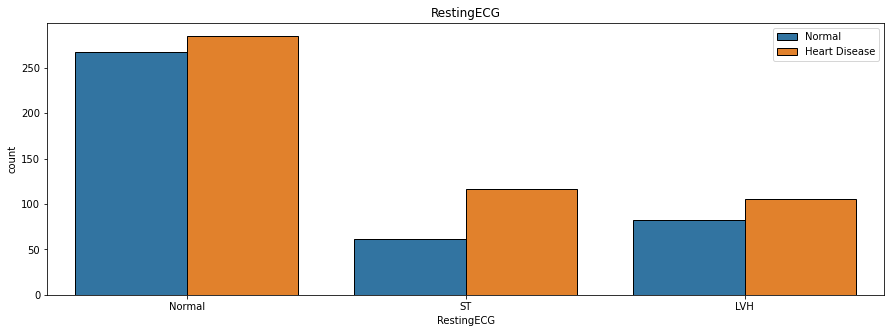

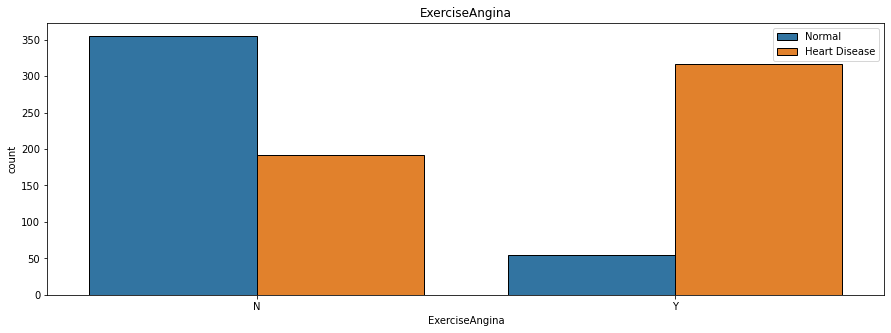

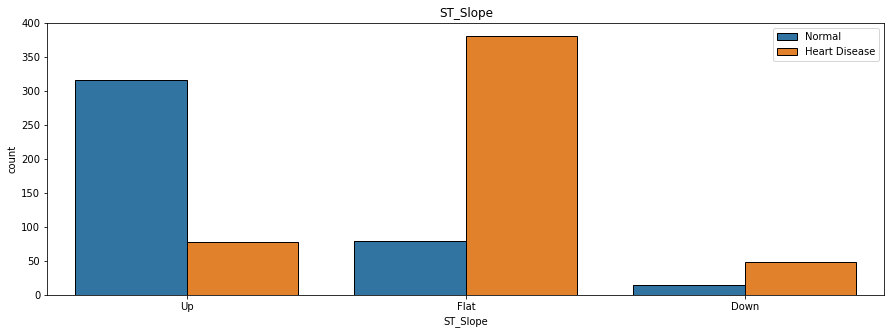

In [95]:
#ploting categorical features with target
Categorical = heartdf.select_dtypes(include=['object'])
for i in Categorical:
    plt.figure(figsize=(15,5))
    sns.countplot(x=i, data=heartdf, hue='HeartDisease', edgecolor='black')
    plt.legend(['Normal', 'Heart Disease'])
    plt.title(i)
    plt.show()

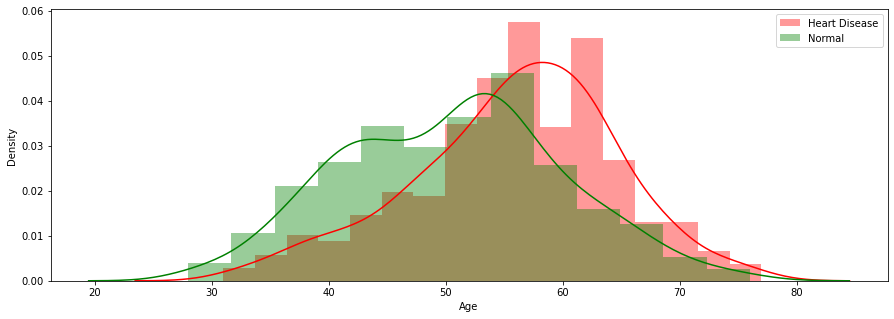

In [96]:
# distribution plot of Age for HeartDisease
plt.figure(figsize=(15, 5))
sns.distplot(heartdf['Age'][heartdf['HeartDisease'] == 1], kde=True, color='red', label='Heart Disease')
sns.distplot(heartdf['Age'][heartdf['HeartDisease'] == 0], kde=True, color='green', label='Normal')
plt.legend()

### Data Preprocessing & Heatures Engineering

In [97]:
heartdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [98]:
Categorical = heartdf.select_dtypes(include=['object'])
Categorical.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [99]:
Numerical = heartdf.select_dtypes(include=['int64', 'float64'])
Numerical.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0


In [100]:
# Using Label Encoder from Scikit-Learn to encode the categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Categorical['Sex_Encoded'] = le.fit_transform(Categorical['Sex'])
Categorical['ChestPainType_Encoded'] = le.fit_transform(Categorical['ChestPainType'])
Categorical['RestingECG_Encoded'] = le.fit_transform(Categorical['RestingECG'])
Categorical['ExerciseAngina_Encoded'] = le.fit_transform(Categorical['ExerciseAngina'])
Categorical['ST_Slope_Encoded'] = le.fit_transform(Categorical['ST_Slope'])
Categorical.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,Sex_Encoded,ChestPainType_Encoded,RestingECG_Encoded,ExerciseAngina_Encoded,ST_Slope_Encoded
0,M,ATA,Normal,N,Up,1,1,1,0,2
1,F,NAP,Normal,N,Flat,0,2,1,0,1
2,M,ATA,ST,N,Up,1,1,2,0,2
3,F,ASY,Normal,Y,Flat,0,0,1,1,1
4,M,NAP,Normal,N,Up,1,2,1,0,2


In [101]:
# Drop the uncoded columns from the categorical data
categorical_data = Categorical.drop(columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], axis = 1)
categorical_data.head()

,Sex_Encoded,ChestPainType_Encoded,RestingECG_Encoded,ExerciseAngina_Encoded,ST_Slope_Encoded
0,1,1,1,0,2
1,0,2,1,0,1
2,1,1,2,0,2
3,0,0,1,1,1
4,1,2,1,0,2


In [102]:
# Rename the catecorical_data columns
categorical_data = categorical_data.rename(columns={'Sex_Encoded':'Sex',
                   'ChestPainType_Encoded':'ChestPainType',
                   'RestingECG_Encoded':'RestingECG',
                   'ExerciseAngina_Encoded':'ExerciseAngina',
                   'ST_Slope_Encoded':'ST_Slope'
                   })
categorical_data.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,1,1,1,0,2
1,0,2,1,0,1
2,1,1,2,0,2
3,0,0,1,1,1
4,1,2,1,0,2


In [103]:
Numerical.head(10)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0
5,39,120,339,0,170,0.0,0
6,45,130,237,0,170,0.0,0
7,54,110,208,0,142,0.0,0
8,37,140,207,0,130,1.5,1
9,48,120,284,0,120,0.0,0


In [105]:
# Merging the categorical and numerical data
df = pd.concat([categorical_data, Numerical], axis = 1)
df.head(10)


,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,1,1,1,0,2,40,140,289,0,172,0.0,0
1,0,2,1,0,1,49,160,180,0,156,1.0,1
2,1,1,2,0,2,37,130,283,0,98,0.0,0
3,0,0,1,1,1,48,138,214,0,108,1.5,1
4,1,2,1,0,2,54,150,195,0,122,0.0,0
5,1,2,1,0,2,39,120,339,0,170,0.0,0
6,0,1,1,0,2,45,130,237,0,170,0.0,0
7,1,1,1,0,2,54,110,208,0,142,0.0,0
8,1,0,1,1,1,37,140,207,0,130,1.5,1
9,0,1,1,0,2,48,120,284,0,120,0.0,0


In [107]:
# Split the target column from the rest of the columns
X = df.drop(['HeartDisease'], axis =1)
y = df['HeartDisease']

Building the model

In [109]:
y.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [110]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((734, 11), (184, 11), (734,), (184,))

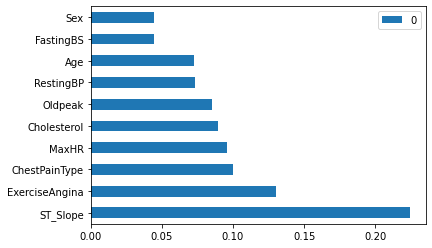

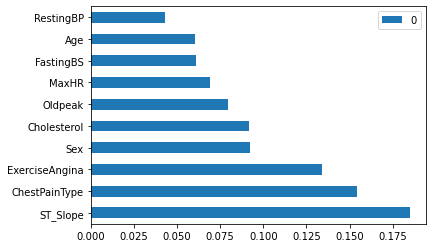

In [111]:
# Feature Importance

from sklearn.ensemble import ExtraTreesClassifier

fi = ExtraTreesClassifier()
fi_train = fi.fit(X_train, y_train)

df_fi_train = pd.DataFrame(fi_train.feature_importances_,index=X_train.columns)
df_fi_train.nlargest(10,df_fi_train.columns).plot(kind='barh')
plt.show()

fi_test = fi.fit(X_test, y_test)

df_fi_test = pd.DataFrame(fi_test.feature_importances_,index=X_test.columns)
df_fi_test.nlargest(10,df_fi_test.columns).plot(kind='barh')
plt.show()

In [112]:
X_train.head(10)

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
810,0,1,0,0,1,55,135,250,0,161,1.4
467,0,1,1,0,2,63,132,0,0,130,0.1
355,1,3,0,0,1,67,145,0,0,125,0.0
478,1,0,2,1,1,57,130,311,1,148,2.0
631,1,0,1,1,1,46,140,311,0,120,1.8
636,1,1,0,0,1,48,130,245,0,180,0.2
179,0,0,1,0,2,46,130,238,0,90,0.0
756,1,0,0,0,2,59,138,271,0,182,0.0
42,1,1,1,0,2,35,150,264,0,168,0.0
807,1,1,1,0,2,54,108,309,0,156,0.0


In [113]:
# Apply algorithm 
# Models to be tested: Logistic Regression, KNearest, SVM, Decision Tree, Random Forest, XGBoost, LightGBM

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [114]:
classifiers = {
    "LogisticRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "SVC" : SVC(),
    "DecisionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier()
}

In [115]:
%%time
#Compute the training score of each models

train_scores = []
test_scores = []

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    train_score = round(classifier.score(X_train, y_train),2)
    train_scores.append(train_score)
    test_score = round(classifier.score(X_test, y_test),2)
    test_scores.append(test_score)

print(train_scores)
print(test_scores)

[0.84, 0.78, 0.73, 1.0, 1.0]
[0.9, 0.73, 0.72, 0.79, 0.9]
Wall time: 821 ms


In [116]:
%%time
from sklearn.model_selection import cross_val_score

train_cross_scores = []
test_cross_scores = []

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    train_score = cross_val_score(classifier, X_train, y_train, cv=5)
    train_cross_scores.append(round(train_score.mean(),2))
    test_score = cross_val_score(classifier, X_test, y_test, cv=5)
    test_cross_scores.append(round(test_score.mean(),2))
    
print(train_cross_scores)
print(test_cross_scores)

[0.84, 0.68, 0.72, 0.79, 0.85]
[0.89, 0.69, 0.76, 0.83, 0.9]
Wall time: 3.41 s


In [117]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = cross_val_predict(rf, X_test, y_test, cv=5)
print(roc_auc_score(y_test, rf_pred))

0.897815623843021


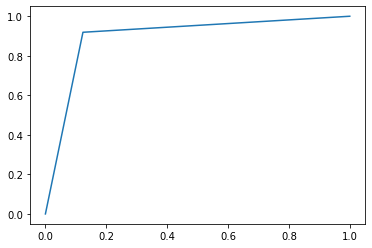

In [118]:
fpr, tpr, _ = roc_curve(y_test, rf_pred)
plt.plot(fpr, tpr)
plt.show()

In [119]:
%%time
# Hyperparameter Tuning


from sklearn.model_selection import GridSearchCV

#Logistic Regression
lr = LogisticRegression()
lr_params = {"penalty": ['l2'], "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                  "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
grid_logistic = GridSearchCV(lr, lr_params)
grid_logistic.fit(X_train, y_train)
lr_best = grid_logistic.best_estimator_
lr_best

Wall time: 6.41 s


LogisticRegression(C=1, solver='newton-cg')

In [120]:
%%time
#KNearest Neighbors
knear = KNeighborsClassifier()
knear_params = {"n_neighbors": list(range(2,7,1)), "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brutle']}
grid_knear = GridSearchCV(knear, knear_params)
grid_knear.fit(X_train, y_train)
knear_best = grid_knear.best_estimator_
knear_best

Wall time: 1.48 s


KNeighborsClassifier()

In [121]:
%%time
#SVC

svc = SVC()
svc_params = {"C": [0.5, 0.7, 0.9, 1], "kernel":['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(svc, svc_params)
grid_svc.fit(X_train, y_train)
svc_best = grid_svc.best_estimator_
svc_best

Wall time: 55.1 s


SVC(C=0.5, kernel='linear')

In [122]:
%%time
#Decision Tree

tree = DecisionTreeClassifier()
tree_params = {"criterion": ['gini', 'entropy'], "max_depth":list(range(2,5,1)), "min_samples_leaf":list(range(5,7,1))}
grid_tree = GridSearchCV(tree, tree_params)
grid_tree.fit(X_train, y_train)
tree_best = grid_tree.best_estimator_
tree_best

Wall time: 407 ms


DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [123]:
%%time
# Using Xgboost to train the model
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_train_score = cross_val_score(xgb_model, X_train, y_train, cv=5)
xgb_test_score = cross_val_score(xgb_model, X_test, y_test, cv=5)

print(round(xgb_train_score.mean(),2))
print(round(xgb_test_score.mean(),2))

0.84
0.88
Wall time: 2.73 s


In [124]:
%%time

# Using lightgbm to train the model
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
lgb_train_score = cross_val_score(lgb_model, X_train, y_train, cv=5)
lgb_test_score = cross_val_score(lgb_model, X_test, y_test, cv=5)

print(round(lgb_train_score.mean(),2))
print(round(lgb_test_score.mean(),2))

0.84
0.88
Wall time: 1.36 s


In [125]:
import pickle

In [127]:
pickle.dump(lgb_model, open("heart_disease.pkl", "wb"))

In [128]:
#Load a saved model
loaded_pickle_model = pickle.load(open("heart_disease.pkl", "rb"))

In [136]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

In [137]:
# Make predictions and evaluate the loaded model
h_disease_pred = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, h_disease_pred)

NameError: name 'precision_score' is not defined